# Guided Project: Analyzing CIA Factbook Data Using SQLite and Python
- This project uses SQL majorly

## Import and reading data from database:

In [12]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('factbook.db') #Connecting to database
cursor = conn.cursor()

q1 = "SELECT * FROM sqlite_master WHERE type='table'"

pd.read_sql_query(q1,conn) #using pandas library

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [13]:
#using sqlite3 library
cursor.execute(q1)
five_facts_rows = cursor.fetchall() 
five_facts_rows

[('table',
  'sqlite_sequence',
  'sqlite_sequence',
  3,
  'CREATE TABLE sqlite_sequence(name,seq)'),
 ('table',
  'facts',
  'facts',
  47,
  'CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, "code" varchar(255) NOT NULL, "name" varchar(255) NOT NULL, "area" integer, "area_land" integer, "area_water" integer, "population" integer, "population_growth" float, "birth_rate" float, "death_rate" float, "migration_rate" float)')]

In [14]:
q2 = 'SELECT * FROM facts LIMIT 5'
pd.read_sql_query(q2,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


## Detail data analysis:

In [16]:
q3 = 'SELECT MIN(population), MAX(population), MIN(population_growth), MAX(population_growth) FROM facts'
pd.read_sql_query(q3,conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


In [18]:
q4 = 'SELECT * FROM facts WHERE population == 0 OR population == (SELECT MAX(population) FROM facts)'
pd.read_sql_query(q4,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000.0,None,0,NaN,NaN,NaN,None
1,261,xx,World,None,NaN,None,7256490011,1.08,18.6,7.8,None


## Histagram:

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a7909e240>,
      dtype=object)

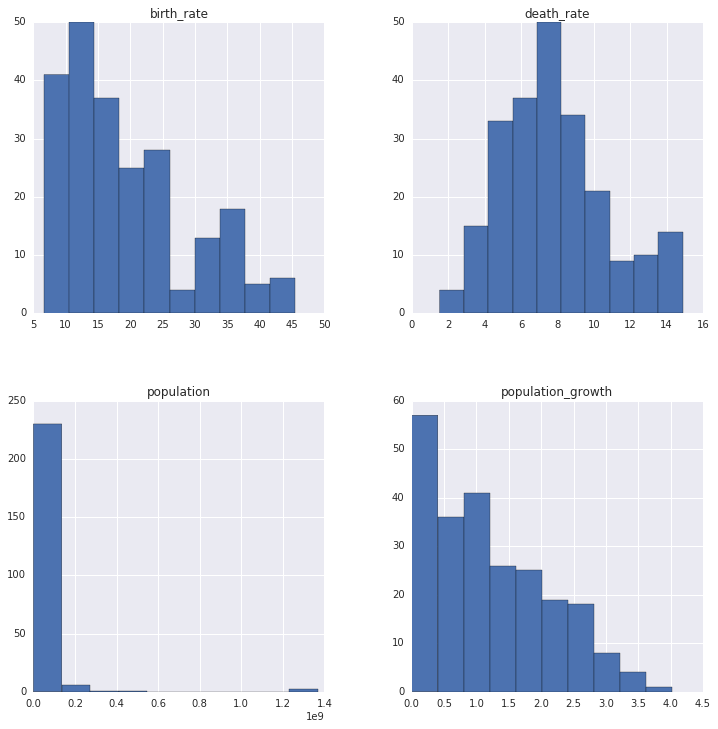

In [39]:
q5 = '''
SELECT population, population_growth, birth_rate, death_rate FROM facts
WHERE population != 0 AND population != (SELECT MAX(population) FROM facts)
'''
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig1 = plt.figure(figsize = (12,12))
ax1 = fig1.add_subplot(111)

dfhist = pd.read_sql_query(q5,conn)
dfhist.hist(ax=ax1)

In [42]:
dfhist

,population,population_growth,birth_rate,death_rate
0,32564342,2.32,38.57,13.89
1,3029278,0.30,12.92,6.58
2,39542166,1.84,23.67,4.31
3,85580,0.12,8.13,6.96
4,19625353,2.78,38.78,11.49
5,92436,1.24,15.85,5.69
6,43431886,0.93,16.64,7.33
7,3056382,0.15,13.61,9.34
8,22751014,1.07,12.15,7.14
9,8665550,0.55,9.41,9.42


## Population density analysis:

In [35]:
q6 = '''SELECT name, CAST(area_land as float)/CAST(population as float) population_density
FROM facts
WHERE population != 0 AND 
population != (SELECT MAX(population) FROM facts)
ORDER BY population_density DESC
''' 
pop_den_df = pd.read_sql_query(q6,conn)
pop_den_df

,name,population_density
0,Greenland,37.519027
1,Svalbard,33.143697
2,Falkland Islands (Islas Malvinas),3.621839
3,Pitcairn Islands,0.979167
4,Mongolia,0.519079
5,Western Sahara,0.465959
6,Namibia,0.372141
7,Australia,0.337668
8,Iceland,0.302032
9,Mauritania,0.286568


In [50]:
q7 = '''SELECT CAST(area_land as float)/CAST(population as float) population_density
FROM facts
WHERE population != 0 AND 
population != (SELECT MAX(population) FROM facts)
''' 
fig2 = plt.figure() 
pd.read_sql_query(q7,conn).hist(min(0),max(5))

TypeError: 'int' object is not iterable

In [43]:
pd.read_sql_query(q7,conn)

,population_density
0,0.020029
1,0.009044
2,0.060233
3,0.005469
4,0.063525
5,0.004782
6,0.063011
7,0.009228
8,0.337668
9,0.009514
